In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

e:\Anaconda\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Nama : Yofandra A.P <br>
NIM  : 2141720121<br>
Absen: 30<br>
Kelas: 3F

### No.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


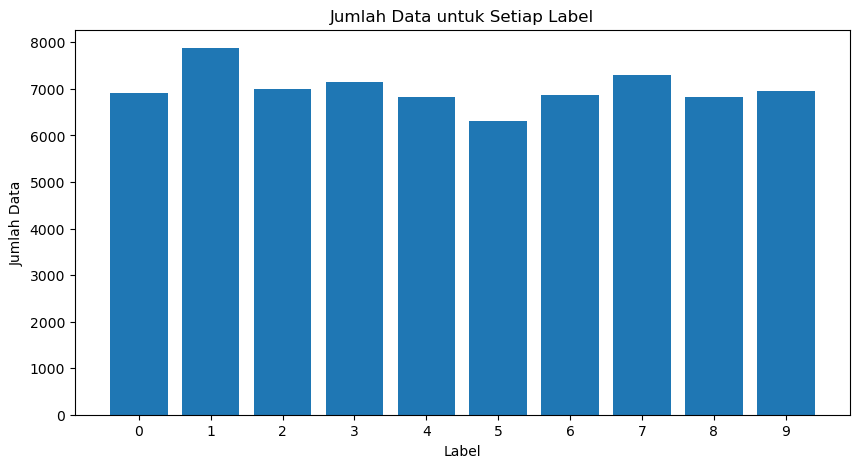

In [3]:
# Mengambil label dan fitur dari dataset
X = mnist.data
y = mnist.target

# Menghitung jumlah data untuk setiap label
label_count = np.bincount(y)

# Menampilkan jumlah data untuk setiap label
for label, count in enumerate(label_count):
    print(f"Label {label}: {count} data")

# Membuat diagram batang
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_count)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data untuk Setiap Label')
plt.show()


In [4]:
# total data
total_data = len(y)

# Menampilkan presentase jumlah data untuk setiap label
for label, count in enumerate(label_count):
    percentage = (count / total_data) * 100
    print(f"Label {label}: {count} data ({percentage:.2f}%) dari total")

Label 0: 6903 data (9.86%) dari total
Label 1: 7877 data (11.25%) dari total
Label 2: 6990 data (9.99%) dari total
Label 3: 7141 data (10.20%) dari total
Label 4: 6824 data (9.75%) dari total
Label 5: 6313 data (9.02%) dari total
Label 6: 6876 data (9.82%) dari total
Label 7: 7293 data (10.42%) dari total
Label 8: 6825 data (9.75%) dari total
Label 9: 6958 data (9.94%) dari total


### No.2

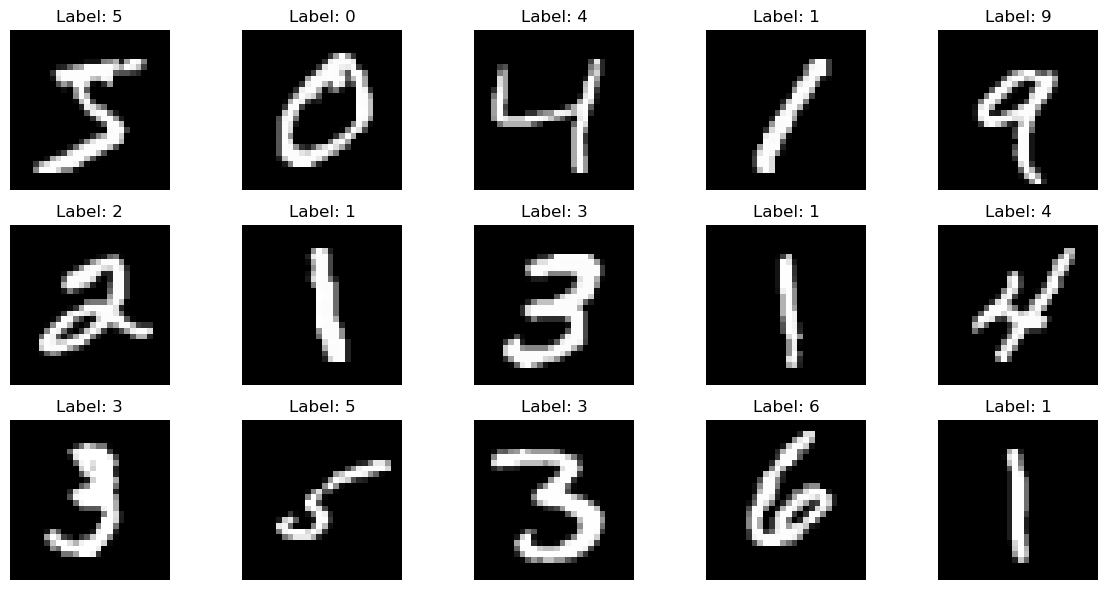

In [5]:
# Mengonversi data citra dari dataframe ke bentuk matriks
X = X.values.astype("float32")
y = y.values.astype("int")

# Menampilkan 15 citra pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### No.3

In [6]:
# Ekstraksi fitur menggunakan PCA
from sklearn.decomposition import PCA

X = mnist.data
y = mnist.target

pca = PCA(n_components=100, whiten=True, random_state=50)
X_pca = pca.fit_transform(X)

print(f"Ukuran data sebelum ekstraksi fitur: {X.shape}")
print(f"Ukuran data setelah ekstraksi fitur: {X_pca.shape}")

Ukuran data sebelum ekstraksi fitur: (70000, 784)
Ukuran data setelah ekstraksi fitur: (70000, 100)


### No.4

In [7]:
from sklearn.model_selection import train_test_split

# Rasio 70:30
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, train_size=0.7, test_size=0.3, random_state=100)
print("Rasio 70:30")
print(f"Data Training : {X_train1.shape, y_train1.shape}")
print(f"Data Testing : {X_test1.shape, y_test1.shape}")

# Rasio 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, train_size=0.8, test_size=0.2, random_state=100)
print("\nRasio 80:20")
print(f"Data Training : {X_train2.shape, y_train2.shape}")
print(f"Data Testing : {X_test2.shape, y_test2.shape}")

# Rasio 90:10
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y, train_size=0.9, test_size=0.1, random_state=100)
print("\nRasio 90:10")
print(f"Data Training : {X_train3.shape, y_train3.shape}")
print(f"Data Testing : {X_test3.shape, y_test3.shape}")

Rasio 70:30
Data Training : ((49000, 100), (49000,))
Data Testing : ((21000, 100), (21000,))

Rasio 80:20
Data Training : ((56000, 100), (56000,))
Data Testing : ((14000, 100), (14000,))

Rasio 90:10
Data Training : ((63000, 100), (63000,))
Data Testing : ((7000, 100), (7000,))


### No.5

#### SVM

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### Rasio 70:30

In [65]:
# Rasio 70:30
# Latih model SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.005)
svm_model.fit(X_train1, y_train1)

# Prediksi menggunakan data pengujian
y_pred_svm1 = svm_model.predict(X_test1)

accuracy_test1 = accuracy_score(y_test1, y_pred_svm1)
print(f'Akurasi: {accuracy_test1 * 100:.2f}%')


Akurasi: 98.09%


##### Rasio 80:20

In [66]:
# Rasio 80:20
# Latih model SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.005)
svm_model.fit(X_train2, y_train2)

# Prediksi menggunakan data pengujian
y_pred_svm2 = svm_model.predict(X_test2)

accuracy_svm2 = accuracy_score(y_test2, y_pred_svm2)
print(f'Akurasi: {accuracy_svm2 * 100:.2f}%')


Akurasi: 98.20%


##### Rasio 90:10

In [67]:
# Rasio 90:10
# Latih model SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.005)
svm_model.fit(X_train3, y_train3)

# Prediksi menggunakan data pengujian
y_pred_svm3 = svm_model.predict(X_test3)

accuracy_svm3 = accuracy_score(y_test3, y_pred_svm3)
print(f'Akurasi: {accuracy_svm3 * 100:.2f}%')

Akurasi: 98.44%


#### Naive Bayes Gaussian

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

##### Rasio 70:30

In [61]:
# Inisiasi GaussianNB
mnb = GaussianNB()

# Fit model
mnb.fit(X_train1, y_train1)

# Prediksi dengan data training
y_pred_train1 = mnb.predict(X_train1)

# Evaluasi akurasi data training
acc_train1 = accuracy_score(y_train1, y_pred_train1)

# Prediksi dengan data training
y_pred_test1 = mnb.predict(X_test1)

# Evaluasi akurasi data training
accuracy_nb1 = accuracy_score(y_test1, y_pred_test1)

# Print hasil evaluasi
print(f'Akurasi: {accuracy_nb1 * 100:.2f}%')

Akurasi: 87.19%


##### Rasio 80:20

In [14]:
# Fit model
mnb.fit(X_train2, y_train2)

# Prediksi dengan data training
y_pred_train2 = mnb.predict(X_train2)

# Evaluasi akurasi data training
acc_train2 = accuracy_score(y_train2, y_pred_train2)

# Prediksi dengan data training
y_pred_test2 = mnb.predict(X_test2)

# Evaluasi akurasi data training
accuracy_nb2 = accuracy_score(y_test2, y_pred_test2)

# Print hasil evaluasi
print(f'Akurasi: {accuracy_nb2 * 100:.2f}%')

Akurasi: 87.41%


##### Rasio 90:10

In [15]:
# Fit model
mnb.fit(X_train3, y_train3)

# Prediksi dengan data training
y_pred_train3 = mnb.predict(X_train3)

# Evaluasi akurasi data training
acc_train3 = accuracy_score(y_train3, y_pred_train3)

# Prediksi dengan data training
y_pred_test3 = mnb.predict(X_test3)

# Evaluasi akurasi data training
accuracy_nb3 = accuracy_score(y_test3, y_pred_test3)

# Print hasil evaluasi
print(f'Akurasi: {accuracy_nb3 * 100:.2f}%')

Akurasi: 87.47%


### No.6

##### SVM

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

##### Rasio 70:30

Evaluasi Model SVM Rasio 70:30
Akurasi: 98.09%
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2035
           1       0.99      0.99      0.99      2379
           2       0.98      0.98      0.98      2104
           3       0.99      0.97      0.98      2193
           4       0.98      0.98      0.98      2104
           5       0.97      0.98      0.98      1860
           6       0.98      0.99      0.99      2094
           7       0.98      0.98      0.98      2155
           8       0.97      0.98      0.98      2004
           9       0.98      0.97      0.97      2072

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



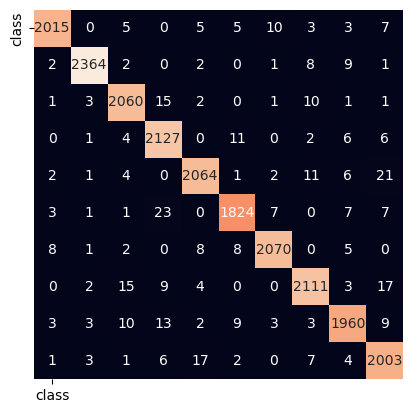

In [68]:
# Rasio 70:30
accuracy_svm1 = accuracy_score(y_test1, y_pred_svm1)
conf_matrix_svm1 = confusion_matrix(y_test1, y_pred_svm1)
class_report_svm1 = classification_report(y_test1, y_pred_svm1)

sns.heatmap(conf_matrix_svm1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)

# Menampilkan Hasil Evaluasi Model pada Rasio 70:30
print('Evaluasi Model SVM Rasio 70:30')
print(f'Akurasi: {accuracy_svm1 * 100:.2f}%')
print(f'Classification Report: {class_report_svm1}')

##### Rasio 80:20

Evaluasi Model SVM Rasio 80:20
Akurasi: 98.20%
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.99      0.99      0.99      1587
           2       0.99      0.97      0.98      1420
           3       0.99      0.98      0.98      1492
           4       0.98      0.98      0.98      1390
           5       0.98      0.98      0.98      1239
           6       0.98      0.99      0.99      1373
           7       0.97      0.99      0.98      1412
           8       0.97      0.98      0.98      1323
           9       0.99      0.97      0.98      1408

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



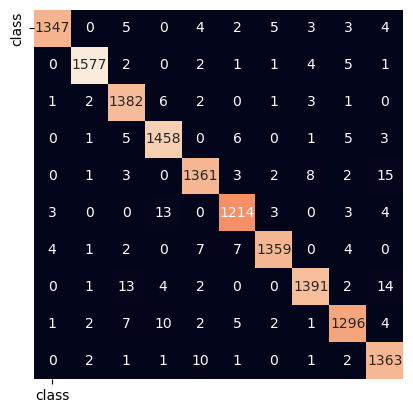

In [69]:
# Rasio 80:30
accuracy_svm2 = accuracy_score(y_test2, y_pred_svm2)
conf_matrix_svm2 = confusion_matrix(y_test2, y_pred_svm2)
class_report_svm2 = classification_report(y_test2, y_pred_svm2)

sns.heatmap(conf_matrix_svm2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)

# Menampilkan Hasil Evaluasi Model pada Rasio 80:20
print('Evaluasi Model SVM Rasio 80:20')
print(f'Akurasi: {accuracy_svm2 * 100:.2f}%')
print(f'Classification Report: {class_report_svm2}')

##### Rasio 90:10

Evaluasi Model SVM Rasio 90:10
Akurasi: 98.44%
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       701
           1       0.99      0.99      0.99       792
           2       0.99      0.98      0.99       713
           3       0.99      0.98      0.98       715
           4       0.98      0.97      0.98       698
           5       0.99      0.99      0.99       630
           6       0.98      0.99      0.99       690
           7       0.98      0.98      0.98       724
           8       0.98      0.99      0.98       639
           9       0.99      0.98      0.98       698

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000



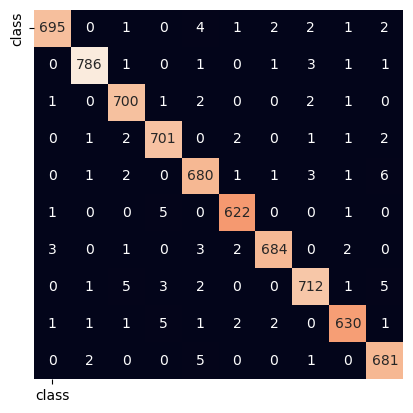

In [70]:
# Rasio 90:10
accuracy_svm3 = accuracy_score(y_test3, y_pred_svm3)
conf_matrix_svm3 = confusion_matrix(y_test3, y_pred_svm3)
class_report_svm3 = classification_report(y_test3, y_pred_svm3)

sns.heatmap(conf_matrix_svm3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)

# Menampilkan Hasil Evaluasi Model pada Rasio 90:10
print('Evaluasi Model SVM Rasio 90:10')
print(f'Akurasi: {accuracy_svm3 * 100:.2f}%')
print(f'Classification Report: {class_report_svm3}')

##### Naive Bayes Gaussian

##### Rasio 70:30

Evaluasi Model SVM Rasio 70:30
Akurasi: 87.19%
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2035
           1       0.98      0.95      0.96      2379
           2       0.75      0.86      0.80      2104
           3       0.84      0.84      0.84      2193
           4       0.89      0.85      0.87      2104
           5       0.79      0.84      0.81      1860
           6       0.93      0.90      0.92      2094
           7       0.93      0.86      0.89      2155
           8       0.83      0.87      0.85      2004
           9       0.84      0.82      0.83      2072

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.88      0.87      0.87     21000



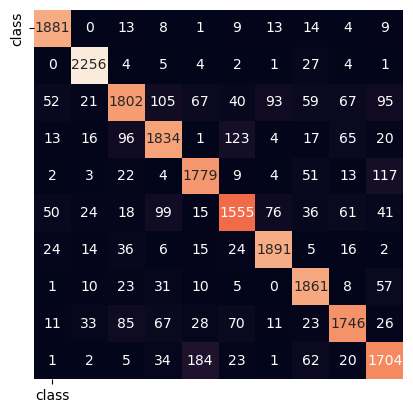

In [71]:
# Rasio 70:30
accuracy_nb1 = accuracy_score(y_test1, y_pred_test1)
conf_matrix_nb1 = confusion_matrix(y_test1, y_pred_test1)
class_report_nb1 = classification_report(y_test1, y_pred_test1)

sns.heatmap(conf_matrix_nb1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)

# Menampilkan Hasil Evaluasi Model pada Rasio 70:30
print('Evaluasi Model SVM Rasio 70:30')
print(f'Akurasi: {accuracy_nb1 * 100:.2f}%')
print(f'Classification Report: {class_report_nb1}')

##### Rasio 80:20

Evaluasi Model SVM Rasio 80:20
Akurasi: 87.41%
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1356
           1       0.98      0.95      0.96      1587
           2       0.76      0.86      0.81      1420
           3       0.84      0.85      0.84      1492
           4       0.89      0.84      0.86      1390
           5       0.80      0.84      0.82      1239
           6       0.93      0.91      0.92      1373
           7       0.92      0.87      0.89      1412
           8       0.83      0.87      0.85      1323
           9       0.85      0.82      0.84      1408

    accuracy                           0.87     14000
   macro avg       0.88      0.87      0.87     14000
weighted avg       0.88      0.87      0.88     14000



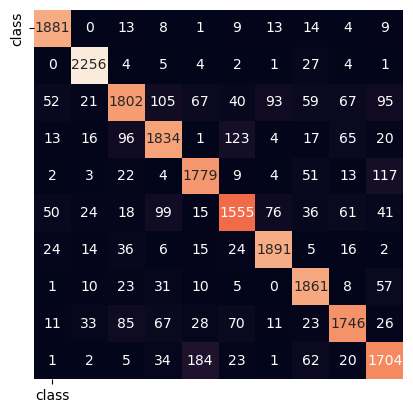

In [72]:
# Rasio 80:20
accuracy_nb2 = accuracy_score(y_test2, y_pred_test2)
conf_matrix_nb2 = confusion_matrix(y_test2, y_pred_test2)
class_report_nb2 = classification_report(y_test2, y_pred_test2)

sns.heatmap(conf_matrix_nb1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)

# Menampilkan Hasil Evaluasi Model pada Rasio 80:20
print('Evaluasi Model SVM Rasio 80:20')
print(f'Akurasi: {accuracy_nb2 * 100:.2f}%')
print(f'Classification Report: {class_report_nb2}')

##### Rasio 90:10

Evaluasi Model SVM Rasio 90:10
Akurasi: 87.47%
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96       701
           1       0.98      0.94      0.96       792
           2       0.76      0.87      0.81       713
           3       0.83      0.85      0.84       715
           4       0.88      0.83      0.86       698
           5       0.80      0.82      0.81       630
           6       0.93      0.90      0.92       690
           7       0.92      0.87      0.89       724
           8       0.83      0.87      0.85       639
           9       0.85      0.83      0.84       698

    accuracy                           0.87      7000
   macro avg       0.88      0.87      0.87      7000
weighted avg       0.88      0.87      0.88      7000



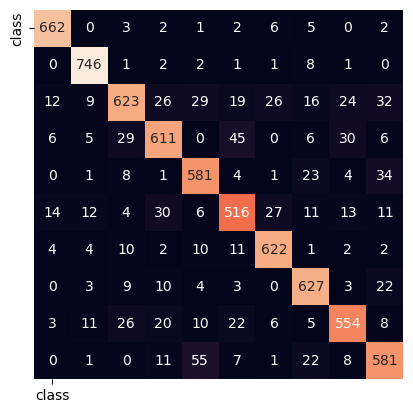

In [73]:
# Rasio 90:10
accuracy_nb3 = accuracy_score(y_test3, y_pred_test3)
conf_matrix_nb3 = confusion_matrix(y_test3, y_pred_test3)
class_report_nb3 = classification_report(y_test3, y_pred_test3)

sns.heatmap(conf_matrix_nb3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)

# Menampilkan Hasil Evaluasi Model pada Rasio 90:10
print('Evaluasi Model SVM Rasio 90:10')
print(f'Akurasi: {accuracy_nb3 * 100:.2f}%')
print(f'Classification Report: {class_report_nb3}')

### No.7

In [74]:
def Label_Predict(xtest, ytest, ypred):
    ytest = ytest.values
    X_restored = pca.inverse_transform(xtest)
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(wspace=0.5, hspace=1)

    for i, (img, y) in enumerate(zip(X_restored[:25].reshape(25, 28, 28), ytest[:25])):
        if ytest[i] == ypred[i]:
            text_color = 'black'
        else:
            text_color = 'red'
            
        plt.subplot(5, 5, 1 + i)
        plt.imshow(img)
        plt.ylabel(f"Predict: {ypred[i]}", color = text_color)
        plt.title(f"{ytest[i]}")
        plt.xticks([])
        plt.yticks([])


##### Rasio 70:30 SVM

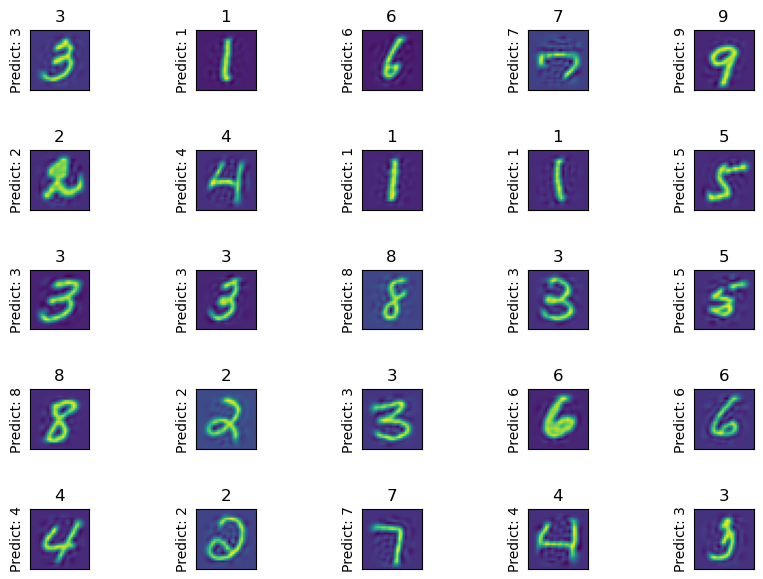

In [76]:
Label_Predict(X_test1, y_test1, y_pred_svm1)

##### Rasio 80:20 SVM

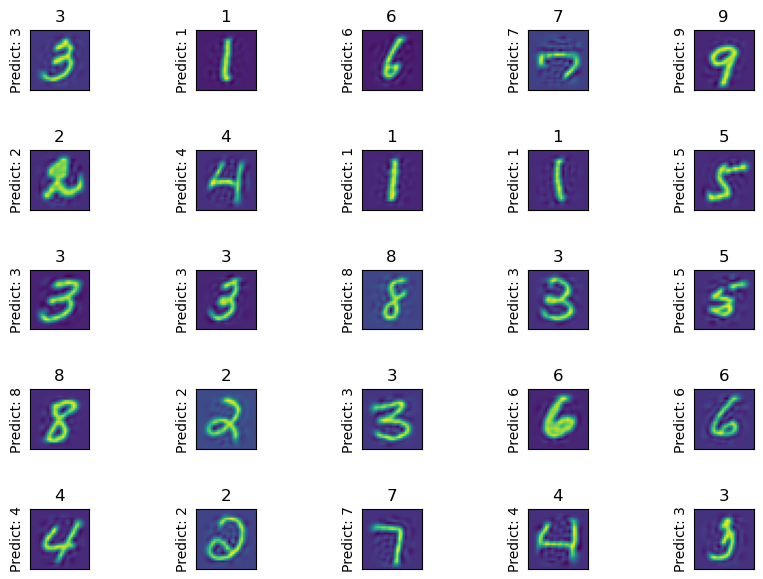

In [77]:
Label_Predict(X_test2, y_test2, y_pred_svm2)

Rasio 90:10 SVM

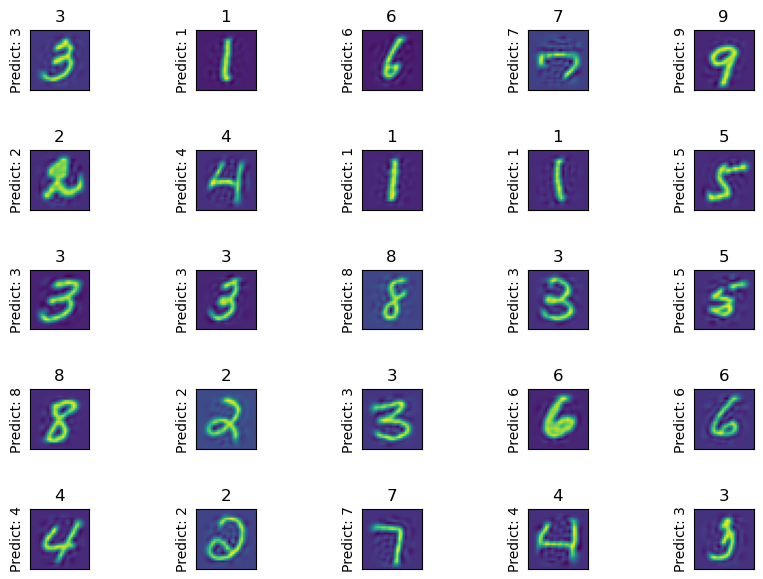

In [78]:
Label_Predict(X_test3, y_test3, y_pred_svm3)

##### Rasio 70:30 Naive Bayes

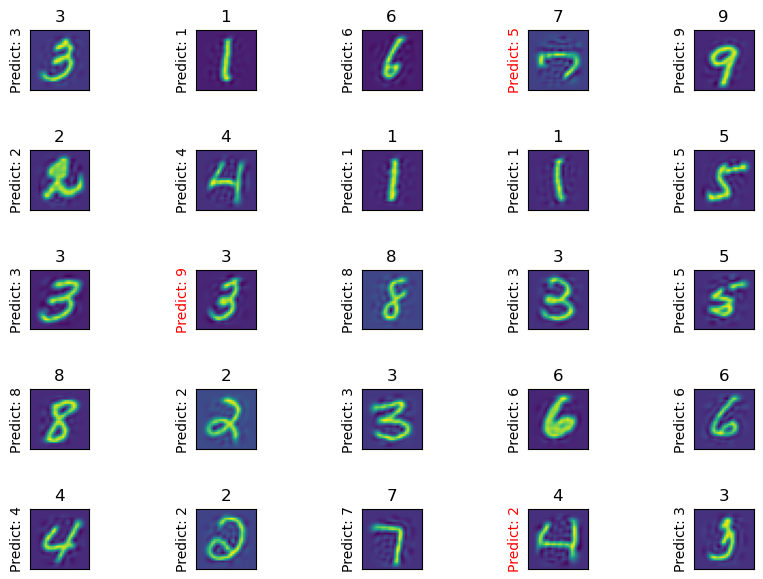

In [58]:
Label_Predict(X_test1, y_test1, y_pred_test1)

##### Rasio 80:20 Naive Bayes

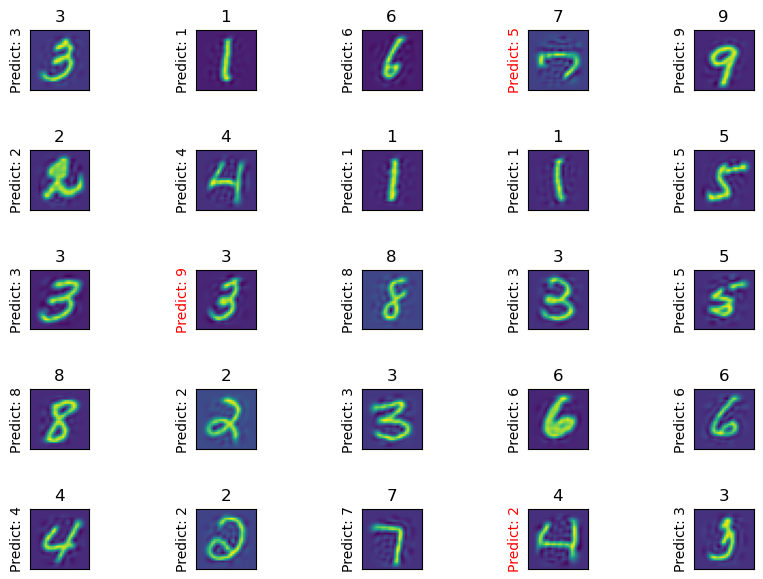

In [59]:
Label_Predict(X_test2, y_test2, y_pred_test2)

Rasio 90:10 Naive Bayes

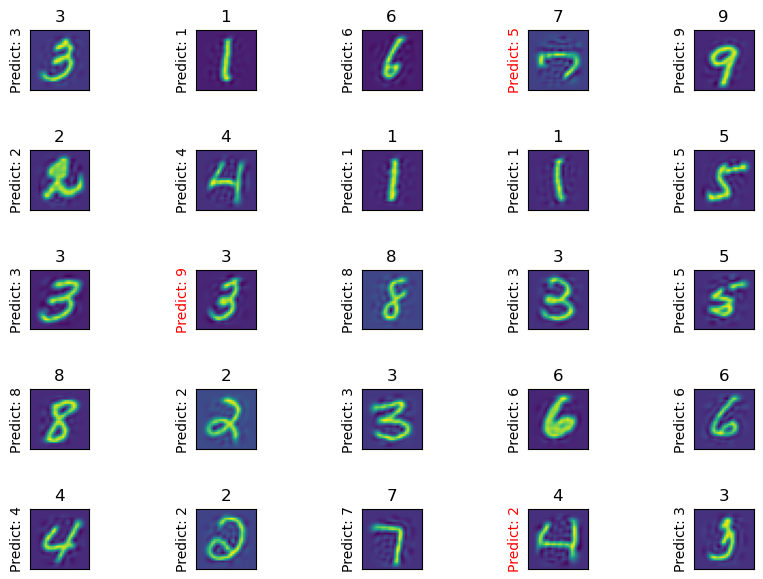

In [60]:
Label_Predict(X_test3, y_test3, y_pred_test3)

### No.8

In [79]:
print('Hasil akurasi setiap model dan rasionya:')
print(f'SVM Rasio 70:30 : {accuracy_svm1 * 100:.2f}%')
print(f'SVM Rasio 80:20 : {accuracy_svm2 * 100:.2f}%')
print(f'SVM Rasio 90:10 : {accuracy_svm3 * 100:.2f}%')
print(f'Naive Bayes Rasio 70:30 : {accuracy_nb1 * 100:.2f}%')
print(f'Naive Bayes Rasio 80:20 : {accuracy_nb2 * 100:.2f}%')
print(f'Naive Bayes Rasio 90:10 : {accuracy_nb3 * 100:.2f}%')

Hasil akurasi setiap model dan rasionya:
SVM Rasio 70:30 : 98.09%
SVM Rasio 80:20 : 98.20%
SVM Rasio 90:10 : 98.44%
Naive Bayes Rasio 70:30 : 87.19%
Naive Bayes Rasio 80:20 : 87.41%
Naive Bayes Rasio 90:10 : 87.47%


Model Terbaik dengan akurasi tertinggi adalah model SVM rasio 90:10 dengan tingkat akurasi sebesar 98,44%. Dan secara keseluruhan maka model SVM memiliki akurasi lebih baik dibandingkan dengan model Naive Bayes 